In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [77]:
# using the build in function to create the iris data set
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [78]:
# selecting all row with : and Sepal Width and Petal Width with [1,3]
X = iris.data[:, [1, 3]]
# selecting the target values
y = iris.target

In [79]:
# probability=True gives us probablity of the prediction
model = SVC(kernel='linear', probability=True) 
model.fit(X, y)

SVC(kernel='linear', probability=True)

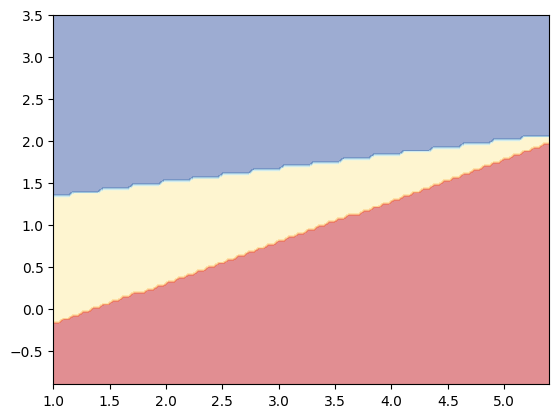

In [80]:
# displaying the decision boundary, here from_estimator generates a meshgrid which takes arguments
# trained_model, input feature dataset, calls model.predict to classify the output points, colormap, alpha is the transparency
# you don't need to call disp explicity, plt.show() takes care of this
# plt.cm.RdYlBu is inbuilt color combination that plots the colors for different values
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method='predict', cmap=plt.cm.RdYlBu, alpha=0.5)
plt.show()

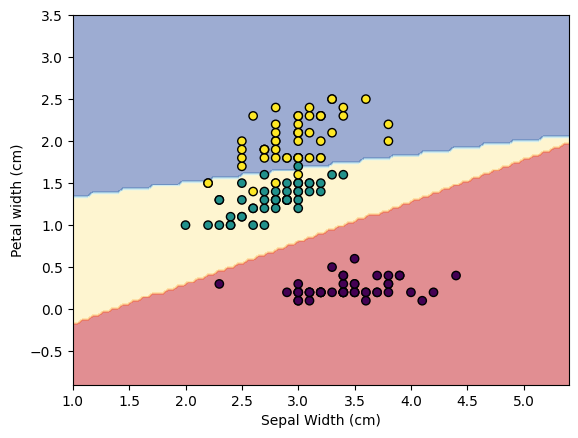

In [81]:
# now adding the datapoints using the scatter plot
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method='predict', cmap=plt.cm.RdYlBu, alpha=0.5)

# c is the color of the points, here we assign it to y(target data), so for each target value we have different color
# edgecolor="k" where k = black in matplotlib, this draws black border on each point making it more visible
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

In [82]:
# in softmax regression, we calcualte the probability of output being in each class using a softmax function 
# e.g.[softmax(x1,0), softmax(x1,1), softmax(x1,2)] = [0.97, 0.2, 0.1]
# then we use the argmax function to get the index of the max probility in our case it is 0, sklearn does this automatically
# verifying this
lr = LogisticRegression(random_state=0).fit(X, y)

In [83]:
# generate the probabilty of our dataset
probability = lr.predict_proba(X)
probability[:5]

array([[9.57579132e-01, 4.23242810e-02, 9.65866230e-05],
       [8.83098199e-01, 1.16656854e-01, 2.44946892e-04],
       [9.21287507e-01, 7.85419909e-02, 1.70502152e-04],
       [9.03874552e-01, 9.59206586e-02, 2.04789162e-04],
       [9.65633406e-01, 3.42870348e-02, 7.95592106e-05]])

<Axes: >

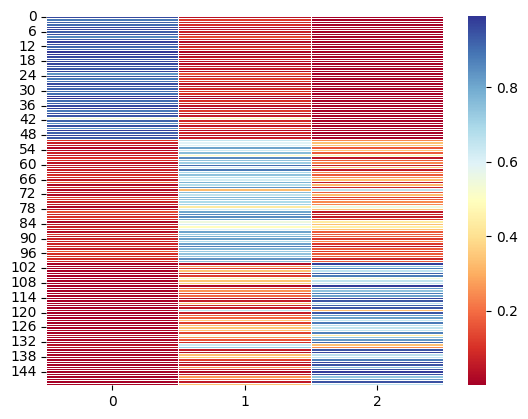

In [84]:
# import seaborn as sns
sns.heatmap(probability, cmap="RdYlBu", linewidths=0.5)

In [85]:
probability[0, :].sum()

np.float64(1.0)

In [86]:
# now using argmax function
np.argmax(probability[0, :])

np.int64(0)

In [87]:
softmax_prediction = np.argmax(probability, axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
# we can verify this with the output of lr.predict
yhat = lr.predict(X)
accuracy_score(softmax_prediction, yhat)

1.0

In [89]:
# since we cannot use softmax regression in SVN because we need output as probablilities like in logistic regression
# SVM works by maximizing the margin of the hyperplane using the support vectors
SVM_model = SVC(kernel='linear', gamma=0.5, probability=True)
SVM_model.fit(X, y)

SVC(gamma=0.5, kernel='linear', probability=True)

In [90]:
yhat = SVM_model.predict(X)
accuracy_score(y, yhat)

0.96

In [91]:
# One vs All (One vs Rest)
# we train on each target class and compare it to all other, and keep on doing that until we do that for all classes
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVM_model)
ovr_clf.fit(X, y)
yhat = ovr_clf.predict(X)
accuracy_score(y, yhat)

0.8933333333333333

In [92]:
# One vs One
# we train on each target class with another class i.e. n(n-1)/2 
from sklearn.multiclass import OneVsOneClassifier
ovr_clf = OneVsOneClassifier(SVM_model)
ovr_clf.fit(X, y)
yhat = ovr_clf.predict(X)
accuracy_score(y, yhat)

0.96